In [ ]:
## Used to predict the real value: like cost of house, investment, sales in a company and blah blah
## Salary prediction using LR
## Regression:- Determines the strength of relationship b/w dependent (Y) and independent (X) variable 
## Mathematical Eqn: Y= mX+b+error, where m= slope, b= y-intercept, i.e. Eqn of straight line
## We have to find the best Eqn of line for our data using LR
## R^2 gives the accuracy, it ranges b/w 0 to 1, if R^2 value is closer to 1 then its a best fit line.
## Error (epsilon) tells how far the actual points are away from predicted points (Actual - predicted)
## Use sklearn library for it

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv("Salary_Data.csv")

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
## Divide data in x and y i.e. x is features , y is target 
## Here x will be experience, y will be salary
## We only need them in array as the LR library expects the data in terms of array only 

In [ ]:
x= data['YearsExperience'].values
y= data['Salary'].values

In [ ]:
## x= pd.array(data['YearsExperience']) // This also converts to array try it later on...

In [ ]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
x.shape 
## For LR the shape should be (number of samples, number of features), We have only 1 feature which is years of experience
## So our shape should be (30,1)
## Feautures are the columns names which will govern our target!

(30,)

In [ ]:
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

In [ ]:
x.shape

(30, 1)

In [ ]:
y.shape

(30, 1)

In [ ]:
## Split the data in training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=0)
## random_state is a set seed kinda thing we took 0 here
## This randomly splits the data in 80:20 ratio for train:test

In [ ]:
xtrain

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [ ]:
xtest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
## Building the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
## Train the model 
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
## Prediction
ypred= model.predict(xtest)
ypred
## The value model has predicted (Used gradient descent)

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [ ]:
ytest
## The actual value we had 

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

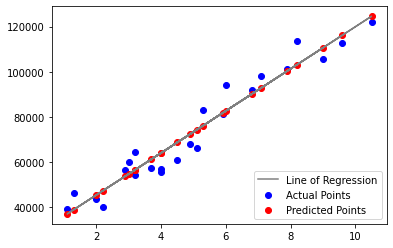

In [ ]:
## Now we draw the line of regression for the TRAINING samples 
## We plot the scatter plots with actual points, predicted points and then the line graph for the regression line
plt.scatter(xtrain,ytrain, color='blue', label= "Actual Points") ## Actual value 
plt.scatter(xtrain, model.predict(xtrain), color='red', label="Predicted Points") ## Predicted value
plt.plot(xtrain,model.predict(xtrain),color='grey', label="Line of Regression") ## Regression line
plt.legend(loc= 4)
plt.show()

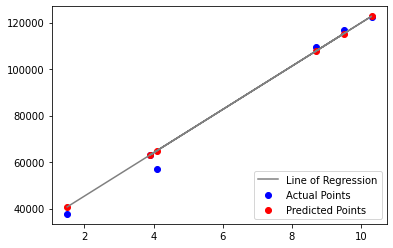

In [ ]:
## Now we draw the line of regression for the TESTING samples 
plt.scatter(xtest,ytest, color='blue', label= "Actual Points") ## Actual value 
plt.scatter(xtest, model.predict(xtest), color='red', label="Predicted Points") ## Predicted value
plt.plot(xtest,model.predict(xtest),color='grey', label="Line of Regression") ## Regression line
plt.legend(loc= 4)
plt.show()

In [ ]:
## Calculating the R^2 i.e. the accuracy of the model
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2
## 0.988169515729126 -- This means we have an accuracy of 98.81% which is damm good!

0.988169515729126

In [ ]:
## Calculation in the MSE (I mean this one is optional if we want to know the mean square error of the data)
from sklearn.metrics import mean_squared_error
e= mean_squared_error(ytest,ypred)
e

12823412.298126549

In [ ]:
## Equation of line 
m = model.coef_
c= model.intercept_
print(m,c)
## [[9312.57512673]] [26780.09915063] // OUTPUT
## So our Eqn of line is Y= 9312.57512673*X + 26780.09915063

[[9312.57512673]] [26780.09915063]


In [ ]:
## We can use this line eqn to find the value of new sample
## If we want to know the sal of 15yr of exp
y= m*15+c
y

array([[166468.72605157]])

In [ ]:
## OR 
model.predict([[15]]) ## Note the double square brackets as this function needs a 2D array

array([[166468.72605157]])

In [ ]:
## Now that the model is trained, I need to save it for future use..
## Saving the created LR model
from sklearn.externals import joblib
joblib.dump(model,'LinearRegression.pkl')
## the above was our (model_name, filename)

['LinearRegression.pkl']

In [ ]:
## To load the created model we do the following 
## Loading the model 
## from sklearn.externals import joblib
## abc= joblib.load('LinearRegression.pkl')
## abc.predict([[123]])

In [ ]:
from sklearn.externals import joblib
model= joblib.load('LinearRegression.pkl')
model.predict([[15]])

array([[166468.72605157]])

In [ ]:
import numpy as np
## Creating a function for salary prediction 
def sal_predict():
  years = int(input("Enter the years of exp: "))
  sal = model.predict([[years]])[0][0]
  ## [0][0] was used since it gives a 2D array so in order to get the clean number apart from brackets we used them!
  sal= np.round(sal)
  return "Salary of the employee: " + str(sal)

In [ ]:
sal_predict()

Enter the years of exp: 15


'Salary of the employee: 166469.0'